# Multy linear regression

In [15]:
!pwd

/Users/pel_btc_coding/code/PelDoingCode/bigdata/maths


In [16]:
ls -l

total 180040
-rw-r--r--  1 pel_btc_coding  staff       276 May 13 09:16 Documentation_TP.md
-rwxr-xr-x@ 1 pel_btc_coding  staff    146978 May 12 17:28 MÇthodes MathÇmatiques pour la Grande Dimension.pdf*
-rwxr-xr-x@ 1 pel_btc_coding  staff     23149 May 13 08:07 NYT_words.dat*
-rwxr-xr-x@ 1 pel_btc_coding  staff  50884728 May 13 08:07 NYT_words_matrix.csv*
-rw-r--r--  1 pel_btc_coding  staff    262195 May 13 12:15 TP - MMGD - ER.ipynb
-rwxr-xr-x@ 1 pel_btc_coding  staff    352494 May 13 08:06 anime_names.csv*
-rwxr-xr-x@ 1 pel_btc_coding  staff  39914789 May 13 08:07 anime_ratings_by_user.csv*
-rw-r--r--@ 1 pel_btc_coding  staff      9825 May 18 11:02 data_regression.xlsx
-rw-r--r--  1 pel_btc_coding  staff    402374 May 17 11:48 pel-TP.ipynb
-rw-r--r--  1 pel_btc_coding  staff    158370 May 24 17:52 regresssion.ipynb


## Load dataset 

In [17]:
import pandas as pd

df = pd.read_excel (r'data_regression.xlsx')
print (df)

   X0    X1    X2     Y
0   1  0.72  0.32  6.93
1   1  0.75  0.12  5.99
2   1  0.53  0.65  1.46
3   1  0.27  0.82  1.44
4   1  0.49  0.15  4.51
5   1  0.02  0.19  1.25
6   1  0.35  0.87  2.53
7   1  0.99  0.71  6.88
8   1  0.98  0.92  6.25
9   1  0.73  0.19  6.36


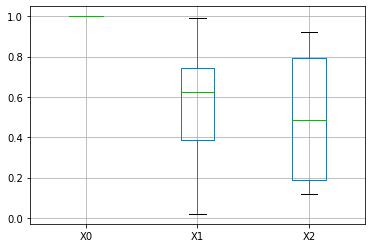

In [18]:

%matplotlib inline  

boxplot = df.boxplot(column=['X0', 'X1','X2'])

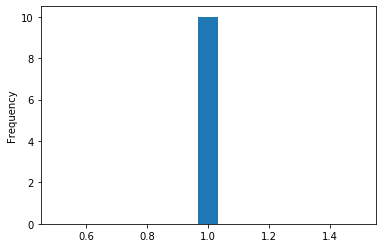

In [19]:
df.X0.plot.hist(bins=15)

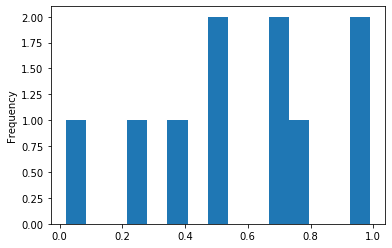

In [20]:
df.X1.plot.hist(bins=15)

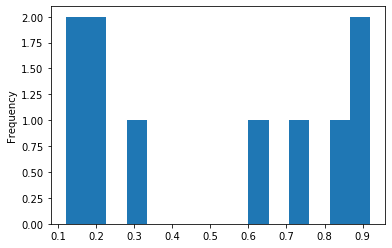

In [21]:
df.X2.plot.hist(bins=15)

#### According to the dataset using a scaler is useless

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
X0    10 non-null int64
X1    10 non-null float64
X2    10 non-null float64
Y     10 non-null float64
dtypes: float64(3), int64(1)
memory usage: 400.0 bytes


In [24]:
df.describe()

,X0,X1,X2,Y
count,10.0,10.000000,10.000000,10.000000
mean,1.0,0.583000,0.494000,4.360000
std,0.0,0.311307,0.328877,2.430459
min,1.0,0.020000,0.120000,1.250000
25%,1.0,0.385000,0.190000,1.727500
50%,1.0,0.625000,0.485000,5.250000
75%,1.0,0.745000,0.792500,6.332500
max,1.0,0.990000,0.920000,6.930000


In [44]:
df.shape

(10, 4)

In [45]:
df.head()

,X0,X1,X2,Y
0,1,0.72,0.32,6.93
1,1,0.75,0.12,5.99
2,1,0.53,0.65,1.46
3,1,0.27,0.82,1.44
4,1,0.49,0.15,4.51


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Looking at the data

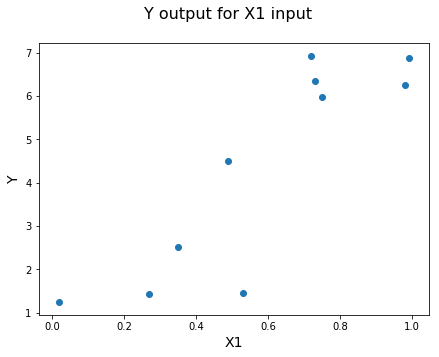

In [47]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('Y output for X1 input', fontsize=16)
plt.scatter(df['X1'], df['Y'])
plt.xlabel('X1', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

In [48]:
df.corr()

,X0,X1,X2,Y
X0,NaN,NaN,NaN,NaN
X1,NaN,1.000000,0.142473,0.870142
X2,NaN,0.142473,1.000000,-0.210442
Y,NaN,0.870142,-0.210442,1.000000


In [49]:
# Correlation matrix
corr = df.corr()

# color it
corr.style.background_gradient(cmap='coolwarm')

/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,X0,X1,X2,Y
X0,nan,nan,nan,nan
X1,nan,1,0.142473,0.870142
X2,nan,0.142473,1,-0.210442
Y,nan,0.870142,-0.210442,1


## Data vizualisation 

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


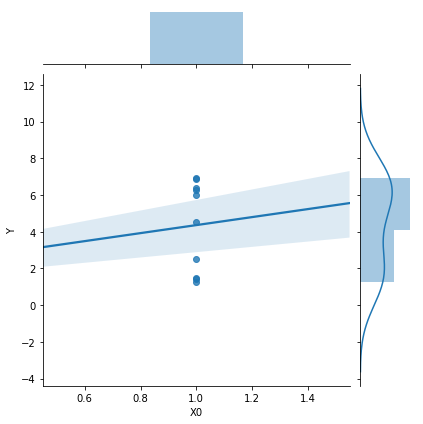

In [50]:
sns.jointplot(x=df['X0'], y=df['Y'], data=df, kind='reg')

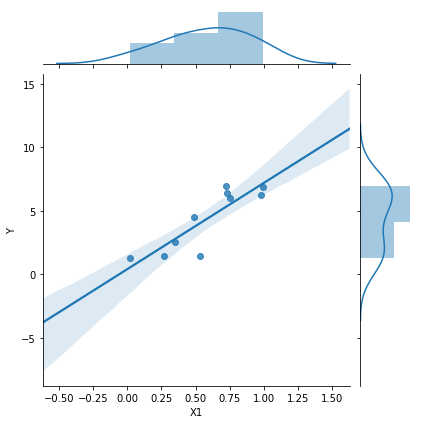

In [51]:
sns.jointplot(x=df['X1'], y=df['Y'], data=df, kind='reg')

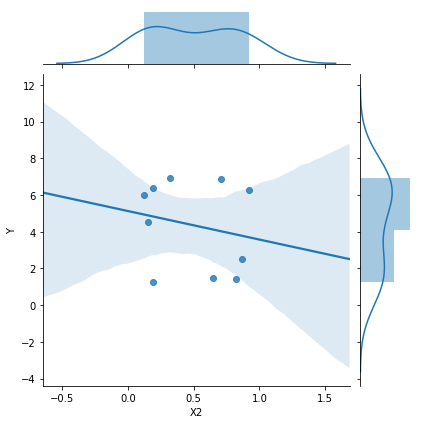

In [52]:
sns.jointplot(x=df['X2'], y=df['Y'], data=df, kind='reg')

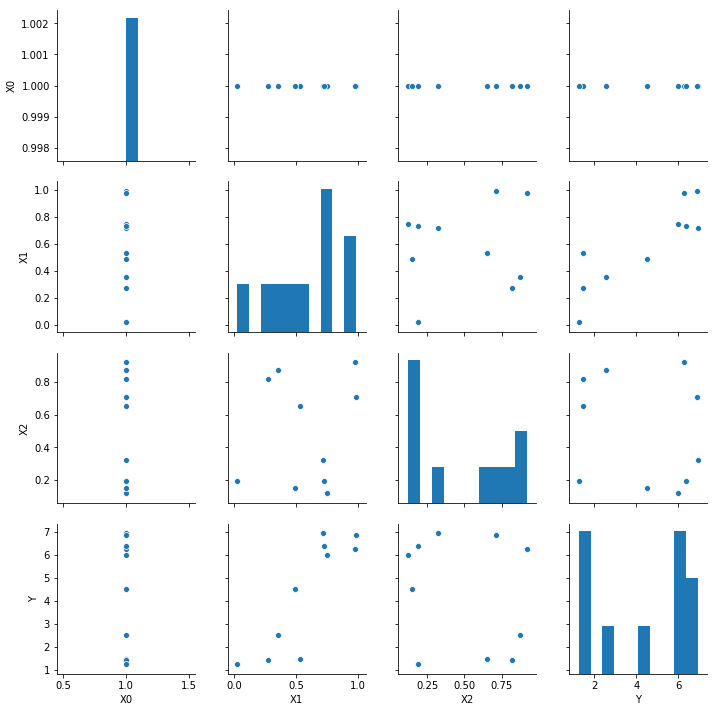

In [53]:
# Pair plots
sns.pairplot(data=df)

### tough to find a pattern cause I don't have enough data, but still can find some symetries

## Multi linear regression 

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$

## Splitting Data into Training and Testing Sets

In [54]:
df.columns

Index(['X0', 'X1', 'X2', 'Y'], dtype='object')

In [55]:
# Putting feature variable to X

X = df[['X0', 'X1', 'X2']]

In [56]:
# Putting response variable to y

y = df['Y']

In [57]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size = 0.2, random_state=100)

In [58]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
fitting = sm.OLS(y_train,X_train).fit()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
#Let's see the summary of our first linear model
print(fitting.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     16.11
Date:                Mon, 18 May 2020   Prob (F-statistic):            0.00661
Time:                        17:38:25   Log-Likelihood:                -10.086
No. Observations:                   8   AIC:                             26.17
Df Residuals:                       5   BIC:                             26.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             1.4007      0.936      1.497      0.1

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### Result are satisfying knowing the dataset and the correlation between variable 

In [60]:
# Prediction for fun
fitting.predict([[1,12,4]])

array([78.27170682])

### We can not do MSE cause the data set is too samll (doesn't make a lot of sens)

In [61]:
#from sklearn.metrics import mean_squared_error

#y_true = ...
#y_pred = ...

#mean_squared_error(y_true, y_pred)

## More classic linear regression 

In [62]:
from sklearn.linear_model import LinearRegression

# Instanciate Linear model
model = LinearRegression()

# Train Linear Model
model.fit(df[['X0', "X1", "X2"]], df['Y'])

LinearRegression()

In [63]:
# Access the model's inner parameters slope(coef_) and intercept(intercept_)
slope_a, intercept_b = model.coef_, model.intercept_ 

print(slope_a)
print(intercept_b)

[ 0.          7.17311794 -2.52258683]
1.4242301343712218


## linear combination of initial dataset columns

## 𝑌 = 𝛽 + 𝛽0𝑋0 + 𝛽1𝑋1 + 𝛽2𝑋2 , with the model above we can get all 𝛽i 

- 𝛽 = 1.42
- 𝛽0 = 0
- 𝛽1 = 7.17
- 𝛽2 = -2.25

- 𝛽0 is not taking into account, it is like an outilier for the model. Which is coherent when looking at the dataset

## END OF JUPITER